In [1]:
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
nodes_df = pd.read_csv('./base_nodes.csv').dropna()
nodes_df

,type,x,y
0,0,96.4331,56.2083
1,1,91.2522,56.2003
2,0,91.6561,56.1883
3,1,95.5711,56.1808
4,0,96.3953,56.1647
...,...,...,...
207,0,94.4248,57.0838
208,0,94.8280,56.8895
209,0,94.2732,56.7307
210,0,93.5106,56.8924


In [3]:
from random import normalvariate as norm
import random

random.seed(0)
dfs = []
for i in range(0, 30, 1):
    tmp_df1 = nodes_df.copy()
    tmp_df1['x'] = tmp_df1['x'].map(lambda x: x + norm(norm(0, 11), 0.8))
    tmp_df1['y'] = tmp_df1['y'].map(lambda x: x + norm(norm(0, 11), 0.8))
    dfs.append(tmp_df1)
nodes_df1 = pd.concat(dfs, ignore_index=True)
nodes_df1

,type,x,y
0,0,94.436553,64.605978
1,1,98.862210,54.042460
2,0,105.978577,61.450591
3,1,97.586976,64.326710
4,0,95.578566,46.403570
...,...,...,...
6355,0,98.159305,64.202843
6356,0,66.270563,58.578194
6357,0,97.506967,42.890265
6358,0,100.345491,60.798463


In [4]:
nodes_df = pd.concat([nodes_df, nodes_df1], ignore_index=True)
nodes_df

,type,x,y
0,0,96.433100,56.208300
1,1,91.252200,56.200300
2,0,91.656100,56.188300
3,1,95.571100,56.180800
4,0,96.395300,56.164700
...,...,...,...
6567,0,98.159305,64.202843
6568,0,66.270563,58.578194
6569,0,97.506967,42.890265
6570,0,100.345491,60.798463


In [5]:
nodes_df = nodes_df.reset_index()
nodes_df

,index,type,x,y
0,0,0,96.433100,56.208300
1,1,1,91.252200,56.200300
2,2,0,91.656100,56.188300
3,3,1,95.571100,56.180800
4,4,0,96.395300,56.164700
...,...,...,...,...
6567,6567,0,98.159305,64.202843
6568,6568,0,66.270563,58.578194
6569,6569,0,97.506967,42.890265
6570,6570,0,100.345491,60.798463


In [6]:
nodes_tuple = tuple(zip(nodes_df['type'],
                        nodes_df['x'],
                        nodes_df['y'],
                        nodes_df['index']))
nodes_tuple

((0, 96.4331, 56.2083, 0),
 (1, 91.2522, 56.2003, 1),
 (0, 91.6561, 56.1883, 2),
 (1, 95.5711, 56.1808, 3),
 (0, 96.3953, 56.1647, 4),
 (0, 91.3083, 56.1533, 5),
 (0, 97.0489, 56.14, 6),
 (0, 94.945, 56.1331, 7),
 (0, 91.4744, 56.1164, 8),
 (0, 95.8206, 56.1067, 9),
 (0, 97.2481, 56.0894, 10),
 (1, 96.7361, 56.0736, 11),
 (0, 91.2825, 56.0703, 12),
 (0, 95.1653, 56.0614, 13),
 (0, 96.3544, 56.0575, 14),
 (0, 96.5753, 56.0478, 15),
 (0, 90.2847, 56.0339, 16),
 (0, 89.8636, 56.0225, 17),
 (0, 95.1528, 56.0094, 18),
 (0, 94.9736, 56.0053, 19),
 (0, 91.0511, 55.9881, 20),
 (0, 89.8378, 55.9703, 21),
 (0, 96.4378, 55.9531, 22),
 (0, 94.9736, 55.945, 23),
 (2, 94.7911, 55.9269, 24),
 (1, 90.7158, 55.9233, 25),
 (0, 95.8419, 55.9047, 26),
 (0, 90.0561, 55.8953, 27),
 (1, 93.5969, 55.8919, 28),
 (0, 90.2056, 55.8608, 29),
 (0, 90.0603, 55.8492, 30),
 (0, 90.8872, 55.8306, 31),
 (0, 91.0972, 55.7961, 32),
 (0, 90.1978, 55.7872, 33),
 (0, 89.8925, 55.7744, 34),
 (0, 90.8767, 55.7581, 35),
 (0, 8

In [7]:
edges_list = []
for node1_index, node1 in tqdm(enumerate(nodes_tuple)):
    for node2_index in range(node1_index + 1, len(nodes_tuple)):
        node2 = nodes_tuple[node2_index]
        dist = ((node1[1] - node2[1]) ** 2 + (node1[2] - node2[2]) ** 2) ** 0.5

        types = (node1[0], node2[0])
        if min(types) == 0:
            if dist < 0.5:
                edges_list.append((node1_index, node2_index, types, dist))
        if min(types) == 1:
            if dist < 2:
                edges_list.append((node1_index, node2_index, types, dist))
        if min(types) == 2:
            if dist < 5:
                edges_list.append((node1_index, node2_index, types, dist))
len(edges_list)

0it [00:00, ?it/s]

15565

In [8]:
edges_df = pd.DataFrame(edges_list)
edges_df.head()

,0,1,2,3
0,0,4,"(0, 0)",0.057704
1,0,11,"(0, 1)",0.331592
2,0,14,"(0, 0)",0.170101
3,0,15,"(0, 0)",0.214432
4,0,22,"(0, 0)",0.255243


In [9]:
edges_df = edges_df.rename({0: 'node1', 1: 'node2', 2: 'node_types', 3: 'weight'}, axis=1)
edges_df

,node1,node2,node_types,weight
0,0,4,"(0, 0)",0.057704
1,0,11,"(0, 1)",0.331592
2,0,14,"(0, 0)",0.170101
3,0,15,"(0, 0)",0.214432
4,0,22,"(0, 0)",0.255243
...,...,...,...,...
15560,6441,6447,"(0, 0)",0.484649
15561,6451,6507,"(1, 1)",1.734124
15562,6457,6499,"(0, 0)",0.339694
15563,6466,6531,"(0, 0)",0.322735


In [10]:
edges_df['min_type'] = edges_df['node_types'].map(lambda x: min(x))
edges_df

,node1,node2,node_types,weight,min_type
0,0,4,"(0, 0)",0.057704,0
1,0,11,"(0, 1)",0.331592,0
2,0,14,"(0, 0)",0.170101,0
3,0,15,"(0, 0)",0.214432,0
4,0,22,"(0, 0)",0.255243,0
...,...,...,...,...,...
15560,6441,6447,"(0, 0)",0.484649,0
15561,6451,6507,"(1, 1)",1.734124,1
15562,6457,6499,"(0, 0)",0.339694,0
15563,6466,6531,"(0, 0)",0.322735,0


In [11]:
edges_df[edges_df['min_type'] == 2]

,node1,node2,node_types,weight,min_type
429,24,58,"(2, 2)",2.623730,2
431,24,89,"(2, 2)",1.897380,2
433,24,123,"(2, 2)",4.384142,2
442,24,448,"(2, 2)",4.886528,2
444,24,482,"(2, 2)",4.569150,2
...,...,...,...,...,...
15382,5813,6384,"(2, 2)",1.405684,2
15406,5847,6384,"(2, 2)",2.750092,2
15451,5960,6449,"(2, 2)",0.210065,2
15485,6059,6271,"(2, 2)",2.949077,2


In [12]:
import networkx as nx

g = nx.Graph()
for i, node in tqdm(enumerate(nodes_tuple)):
    g.add_node(i)

0it [00:00, ?it/s]

In [13]:
for index, row in tqdm(edges_df.iterrows()):
    g.add_edge(row['node1'], row['node2'])

0it [00:00, ?it/s]

In [14]:
components = nx.connected_components(g)
components

<generator object connected_components at 0x000001E8AD136820>

In [15]:
components_list = []
for comp in tqdm(components):
    components_list.append(comp)
list(map(len, components_list))

0it [00:00, ?it/s]

[4365,
 2,
 1,
 1,
 2,
 10,
 3,
 1,
 1,
 1,
 6,
 4,
 1,
 3,
 32,
 1,
 4,
 10,
 2,
 1,
 15,
 4,
 1,
 2,
 6,
 1,
 2,
 1,
 1,
 1,
 4,
 1,
 2,
 6,
 1,
 4,
 6,
 2,
 1,
 3,
 3,
 4,
 17,
 1,
 1,
 1,
 3,
 9,
 1,
 3,
 7,
 3,
 10,
 1,
 2,
 6,
 6,
 2,
 1,
 2,
 11,
 1,
 11,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 24,
 3,
 18,
 3,
 4,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 1,
 2,
 3,
 3,
 3,
 4,
 1,
 1,
 8,
 5,
 2,
 1,
 1,
 7,
 2,
 1,
 1,
 6,
 13,
 3,
 5,
 12,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 6,
 3,
 9,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 6,
 4,
 2,
 4,
 3,
 1,
 2,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 7,
 12,
 5,
 1,
 7,
 5,
 1,
 1,
 7,
 1,
 2,
 5,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 8,
 1,
 1,
 2,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 1,
 11,
 1,
 4,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 6,
 1,
 1,
 1,
 2,
 1,
 2,
 5,
 2,
 1,
 1,
 4,
 1,
 1,
 2,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 7,
 4,
 1,
 1,
 8,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 4,

In [16]:
list(filter(lambda x: x[3] in components_list[0], nodes_tuple))

[(0, 96.4331, 56.2083, 0),
 (1, 91.2522, 56.2003, 1),
 (0, 91.6561, 56.1883, 2),
 (1, 95.5711, 56.1808, 3),
 (0, 96.3953, 56.1647, 4),
 (0, 91.3083, 56.1533, 5),
 (0, 97.0489, 56.14, 6),
 (0, 94.945, 56.1331, 7),
 (0, 91.4744, 56.1164, 8),
 (0, 95.8206, 56.1067, 9),
 (0, 97.2481, 56.0894, 10),
 (1, 96.7361, 56.0736, 11),
 (0, 91.2825, 56.0703, 12),
 (0, 95.1653, 56.0614, 13),
 (0, 96.3544, 56.0575, 14),
 (0, 96.5753, 56.0478, 15),
 (0, 90.2847, 56.0339, 16),
 (0, 89.8636, 56.0225, 17),
 (0, 95.1528, 56.0094, 18),
 (0, 94.9736, 56.0053, 19),
 (0, 91.0511, 55.9881, 20),
 (0, 89.8378, 55.9703, 21),
 (0, 96.4378, 55.9531, 22),
 (0, 94.9736, 55.945, 23),
 (2, 94.7911, 55.9269, 24),
 (1, 90.7158, 55.9233, 25),
 (0, 95.8419, 55.9047, 26),
 (0, 90.0561, 55.8953, 27),
 (1, 93.5969, 55.8919, 28),
 (0, 90.2056, 55.8608, 29),
 (0, 90.0603, 55.8492, 30),
 (0, 90.8872, 55.8306, 31),
 (0, 91.0972, 55.7961, 32),
 (0, 90.1978, 55.7872, 33),
 (0, 89.8925, 55.7744, 34),
 (0, 90.8767, 55.7581, 35),
 (0, 8

In [17]:
nodes_df = pd.DataFrame(list(filter(lambda x: x[3] in components_list[0], nodes_tuple)), columns=['type', 'x', 'y', 'old_index']).reset_index()
nodes_df

,index,type,x,y,old_index
0,0,0,96.433100,56.208300,0
1,1,1,91.252200,56.200300,1
2,2,0,91.656100,56.188300,2
3,3,1,95.571100,56.180800,3
4,4,0,96.395300,56.164700,4
...,...,...,...,...,...
4360,4360,0,95.207798,35.245214,6563
4361,4361,0,96.658273,62.121063,6565
4362,4362,0,98.159305,64.202843,6567
4363,4363,0,97.506967,42.890265,6569


In [18]:
nodes_df.to_csv('variant6/nodes.csv')

In [19]:
nodes_tuple = tuple(zip(nodes_df['type'],
                        nodes_df['x'],
                        nodes_df['y'],
                        nodes_df['index']))
nodes_tuple

((0, 96.4331, 56.2083, 0),
 (1, 91.2522, 56.2003, 1),
 (0, 91.6561, 56.1883, 2),
 (1, 95.5711, 56.1808, 3),
 (0, 96.3953, 56.1647, 4),
 (0, 91.3083, 56.1533, 5),
 (0, 97.0489, 56.14, 6),
 (0, 94.945, 56.1331, 7),
 (0, 91.4744, 56.1164, 8),
 (0, 95.8206, 56.1067, 9),
 (0, 97.2481, 56.0894, 10),
 (1, 96.7361, 56.0736, 11),
 (0, 91.2825, 56.0703, 12),
 (0, 95.1653, 56.0614, 13),
 (0, 96.3544, 56.0575, 14),
 (0, 96.5753, 56.0478, 15),
 (0, 90.2847, 56.0339, 16),
 (0, 89.8636, 56.0225, 17),
 (0, 95.1528, 56.0094, 18),
 (0, 94.9736, 56.0053, 19),
 (0, 91.0511, 55.9881, 20),
 (0, 89.8378, 55.9703, 21),
 (0, 96.4378, 55.9531, 22),
 (0, 94.9736, 55.945, 23),
 (2, 94.7911, 55.9269, 24),
 (1, 90.7158, 55.9233, 25),
 (0, 95.8419, 55.9047, 26),
 (0, 90.0561, 55.8953, 27),
 (1, 93.5969, 55.8919, 28),
 (0, 90.2056, 55.8608, 29),
 (0, 90.0603, 55.8492, 30),
 (0, 90.8872, 55.8306, 31),
 (0, 91.0972, 55.7961, 32),
 (0, 90.1978, 55.7872, 33),
 (0, 89.8925, 55.7744, 34),
 (0, 90.8767, 55.7581, 35),
 (0, 8

In [20]:
edges_list = []
for node1_index, node1 in tqdm(enumerate(nodes_tuple)):
    for node2_index in range(node1_index + 1, len(nodes_tuple)):
        node2 = nodes_tuple[node2_index]
        dist = ((node1[1] - node2[1]) ** 2 + (node1[2] - node2[2]) ** 2) ** 0.5

        types = (node1[0], node2[0])
        if min(types) == 0:
            if dist < 0.5:
                edges_list.append((node1_index, node2_index, types, dist))
        if min(types) == 1:
            if dist < 2:
                edges_list.append((node1_index, node2_index, types, dist))
        if min(types) == 2:
            if dist < 5:
                edges_list.append((node1_index, node2_index, types, dist))
len(edges_list)

0it [00:00, ?it/s]

14367

In [21]:
edges_df = pd.DataFrame(edges_list)
edges_df = edges_df.rename({0: 'node1', 1: 'node2', 2: 'node_types', 3: 'weight'}, axis=1)
edges_df

,node1,node2,node_types,weight
0,0,4,"(0, 0)",0.057704
1,0,11,"(0, 1)",0.331592
2,0,14,"(0, 0)",0.170101
3,0,15,"(0, 0)",0.214432
4,0,22,"(0, 0)",0.255243
...,...,...,...,...
14362,4272,4276,"(0, 0)",0.484649
14363,4280,4320,"(1, 1)",1.734124
14364,4285,4314,"(0, 0)",0.339694
14365,4292,4336,"(0, 0)",0.322735


In [22]:
edges_df['min_type'] = edges_df['node_types'].map(lambda x: min(x))
edges_df

,node1,node2,node_types,weight,min_type
0,0,4,"(0, 0)",0.057704,0
1,0,11,"(0, 1)",0.331592,0
2,0,14,"(0, 0)",0.170101,0
3,0,15,"(0, 0)",0.214432,0
4,0,22,"(0, 0)",0.255243,0
...,...,...,...,...,...
14362,4272,4276,"(0, 0)",0.484649,0
14363,4280,4320,"(1, 1)",1.734124,1
14364,4285,4314,"(0, 0)",0.339694,0
14365,4292,4336,"(0, 0)",0.322735,0


<AxesSubplot: >

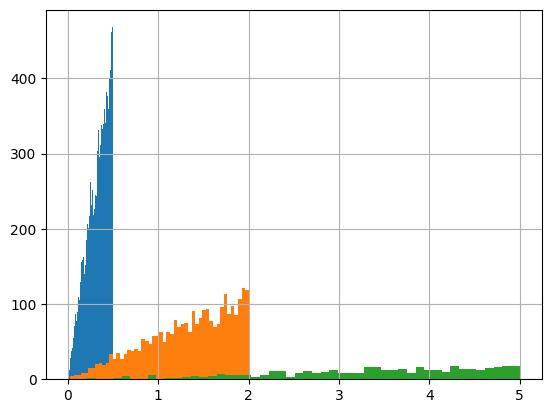

In [23]:
edges_df.loc[edges_df['min_type'] == 0]['weight'].hist(bins=50)
edges_df.loc[edges_df['min_type'] == 1]['weight'].hist(bins=50)
edges_df.loc[edges_df['min_type'] == 2]['weight'].hist(bins=50)

In [24]:
edges_df.to_csv('variant6/edges.csv',index=False)

In [25]:
g = nx.Graph()
for i, node in tqdm(enumerate(nodes_tuple)):
    g.add_node(i)

0it [00:00, ?it/s]

In [26]:
for index, row in tqdm(edges_df.iterrows()):
    g.add_edge(row['node1'], row['node2'])

0it [00:00, ?it/s]

In [32]:
A = nx.adjacency_matrix(g)
A = A.todense()
A

C:\Users\PCuser\AppData\Local\Temp\ipykernel_7240\3085957812.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g)
C:\Users\PCuser\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\222.4459.20\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:606: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in s.iteritems():
C:\Users\PCuser\AppData\Local\JetBrains\Toolbox\apps\PyCharm-P\ch-0\222.4459.20\plugins\python\helpers\pydev\_pydevd_bundle\pydevd_utils.py:606: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in s.iteritems():


KeyboardInterrupt: 